In [2]:
# https://learn.qiskit.org/course/introduction/grovers-search-algorithm
with open('examples/3sat.dimacs', 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs)

c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0



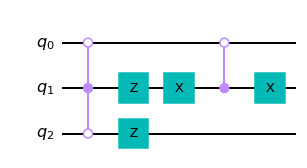

In [3]:
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file('examples/3sat.dimacs')
oracle.draw('mpl')

In [36]:
print(oracle.qasm())

OPENQASM 2.0;
include "qelib1.inc";
gate ccz q0,q1,q2 { p(pi/4) q1; p(pi/4) q2; cx q1,q2; u(0,0,-pi/4) q2; cx q1,q2; u(0,0,0) q2; cx q1,q0; p(-pi/4) q0; p(pi/4) q2; cx q0,q2; u(0,0,pi/4) q2; cx q0,q2; u(0,-pi/2,0) q2; cx q1,q0; p(pi/4) q0; p(pi/4) q2; cx q0,q2; u(0,0,-pi/4) q2; cx q0,q2; u(0,0,0) q2; }
gate ccz_o0 q0,q1,q2 { x q0; x q1; ccz q0,q1,q2; x q0; x q1; }
gate cz_o0 q0,q1 { x q0; cz q0,q1; x q0; }
qreg q[3];
ccz_o0 q[0],q[2],q[1];
z q[1];
x q[1];
cz_o0 q[0],q[1];
x q[1];
z q[2];



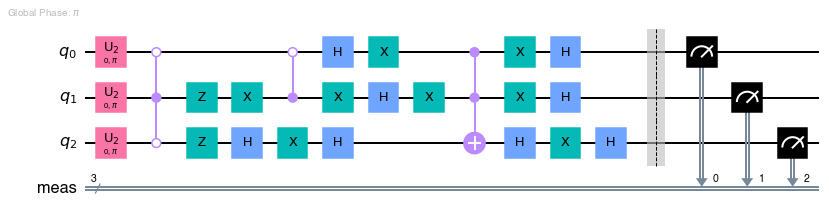

In [39]:
from qiskit import QuantumCircuit
init = QuantumCircuit(3)
init.h([0,1,2])
# init.draw('mpl')

# step 2 & 3 of Grover's algorithm
from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle)
qc = init.compose(grover_operator)
qc.measure_all()
qc.decompose().draw('mpl')

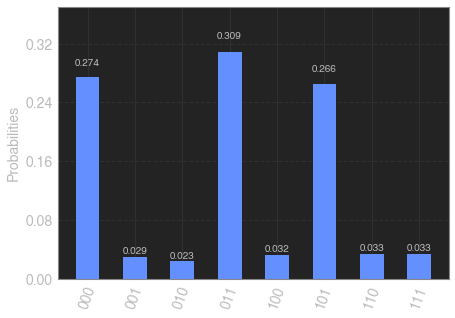

In [40]:
# Simulate circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)